In [1]:
import sys
sys.path.append("../")
import numpy as np 
from utils import *
from lattice import *
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensornetwork as tn

In [14]:
sps = 3
bd = 2
res = []
for seed in range(0, 100):
    parent_dir = f"../array/torch/FF1D_loc_2/s_3_r_2_lt_1_d_1_seed_{seed}/1_mel_LION/lr_0.01_epoch_20000"
    u_path, lv = path_with_lowest_loss(parent_dir)
    A = FF.block1D(bd, sps, bd, seed=seed)
    # mps_nodes, mps_edges = FF.create_MPS(6, A)
    # for k in range(len(mps_edges)):
    #     C = tn.contract(mps_edges[k])
    # y = C.tensor.reshape(sps**2, -1)
    A2 = np.einsum("ijk,klm->jlim", A, A).reshape(sps**2, bd**2)
    U, s , V = np.linalg.svd(A2)
    Up = U[:, len(s):]
    h = Up @ Up.T
    L = 6
    H = sum_ham(h, [[i, (i + 1) % L] for i in range(L)], L, sps)
    E = np.linalg.eigvalsh(H)
    gap = E[1] - E[0]
    res.append({
        "seed" : seed,
        "E" : np.linalg.eigvalsh(H),
        "loss" : lv,
        "gap" : gap
    })
#     print(f"finish seed = {seed}")


finish seed = 0
finish seed = 1
finish seed = 2
finish seed = 3
finish seed = 4
finish seed = 5
finish seed = 6
finish seed = 7
finish seed = 8
finish seed = 9
finish seed = 10
finish seed = 11
finish seed = 12
finish seed = 13
finish seed = 14
finish seed = 15
finish seed = 16
finish seed = 17
finish seed = 18
finish seed = 19
finish seed = 20
finish seed = 21
finish seed = 22
finish seed = 23
finish seed = 24
finish seed = 25
finish seed = 26
finish seed = 27
finish seed = 28
finish seed = 29
finish seed = 30
finish seed = 31
finish seed = 32
finish seed = 33
finish seed = 34
finish seed = 35
finish seed = 36
finish seed = 37
finish seed = 38
finish seed = 39
finish seed = 40
finish seed = 41
finish seed = 42
finish seed = 43
finish seed = 44
finish seed = 45
finish seed = 46
finish seed = 47
finish seed = 48
finish seed = 49
finish seed = 50
finish seed = 51
finish seed = 52
finish seed = 53
finish seed = 54
finish seed = 55
finish seed = 56
finish seed = 57
finish seed = 58
finish 

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### raw data

- Are loss for low gapped data necessarily small?
    - If so, below how many energy gap?
- Should it behave like linear? If so, theorically optimize the outliers upto emperical line?
 

/Users/keisukemurota/miniconda3/envs/torch21/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


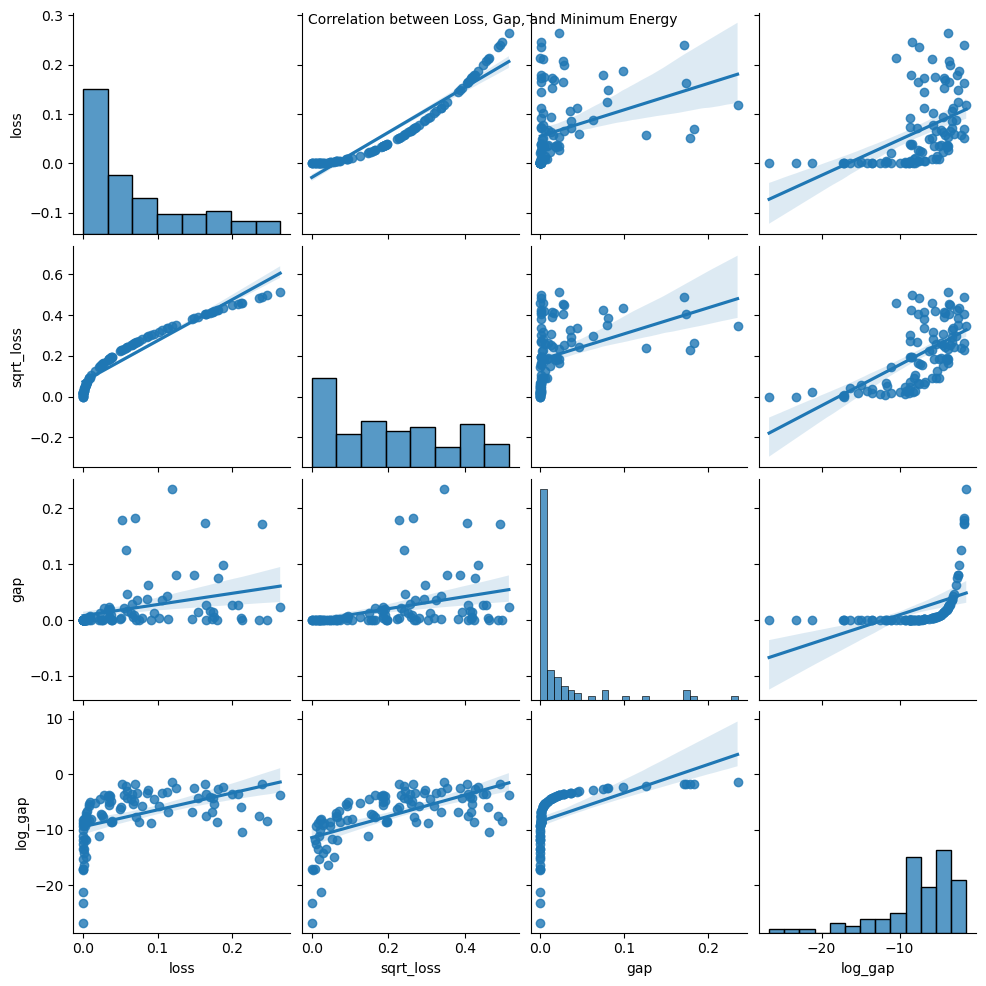

In [57]:
df = pd.DataFrame(res)
df['min_energy'] = df['E'].apply(lambda x: x[1])
df["log_gap"] = df.gap.apply(np.log)
df["sqrt_loss"] = df.loss.apply(np.sqrt)
df["log_loss"] = df.loss.apply(lambda x: np.log(x+0.0001))
# Create a pairplot to visualize the correlations between loss, gap, and minimum energy.
sns.pairplot(df[['loss',"sqrt_loss", 'gap', "log_gap"]] , kind='reg' , diag_kind="hist")

# Set titles and labels.
plt.suptitle('Correlation between Loss, Gap, and Minimum Energy', size=10)
plt.show()

### Remove high gapped data
tbd

# Canonical form

## Calculate transfer matrix

In [36]:
for seed in range(0, 11):
    A = FF.block1D(bd, sps, bd, seed=seed)
    A_ = A.transpose(1,0,2)
    A_tilde_ = np.einsum("ijk,ilm->jlkm", A_, A_)
    A_tilde = A_tilde_.reshape(4,4)
    e_t = np.linalg.eigvalsh(A_tilde)
    res[seed]["et"]  = e_t
    
    A2 = np.einsum("ijk,klm->jlim",A,A)
    A2_ = A2.reshape(sps**2, bd, bd)
    A2_tilde_ = np.einsum("ijk,ilm->jlkm", A2_, A2_)
    A2_tilde = A2_tilde_.reshape(4,4)
    e_t = np.linalg.eigvalsh(A2_tilde)
    res[seed]["et2"]  = e_t

In [37]:
for key, val in res.items():
    print(f'loss: {val["loss"]}')
    print(f'gap : {val["gap"]}')
    print(f"et : {val['et']}")
    print(f"et2 : {val['et2']}")
    print("\n")

loss: 0.17387
gap : 0.014409947267715335
et : [1.07903285 1.41623274 4.14088113 8.92945925]
et2 : [ 1.16431189  2.00571517 17.14689655 79.73524257]


loss: 0.0
gap : 3.808084226575378e-08
et : [-3.52683104 -2.4892931   3.46655985  5.3265312 ]
et2 : [ 6.19658016 12.01703717 12.43853718 28.37193457]


loss: 2e-05
gap : 3.088894926684373e-08
et : [-1.80583275 -1.69885453  7.63632091  8.15280263]
et2 : [ 2.8861067   3.26103194 58.31339699 66.46819078]


loss: 0.26422
gap : 0.022424657326068447
et : [-3.0497284  -0.4825839   1.14272441  4.25264852]
et2 : [ 0.23288722  1.30581908  9.30084333 18.08501945]


loss: 0.09499
gap : 0.012584317829217564
et : [0.7080587  0.83183422 0.92752041 2.80439502]
et2 : [0.50134713 0.69194816 0.86029412 7.86463145]


loss: 0.06638
gap : 0.00510515577127765
et : [-1.50881426 -0.8815801   0.66147717  6.17440182]
et2 : [ 0.43755205  0.77718348  2.27652046 38.12323784]


loss: 0.027
gap : 0.00046814891419191395
et : [-5.25731758 -2.88693889  2.25853235 12.8175936